In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

# Convolutional Neural Network with Tensorflow

CNN on MNIST. 


## Download Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# rescale x to be in [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

# categorical encoding for y
n_classes = 10

y_train_cat = np.zeros([len(y_train), n_classes])
y_train_cat[range(len(y_train)),y_train]= 1


y_test_cat = np.zeros([len(y_test), n_classes])
y_test_cat[range(len(y_test)),y_test]= 1


print('x train: ', x_train.shape)
print('y train: ', y_train_cat.shape)


print('x test: ', x_test.shape)
print('y test: ', y_test_cat.shape)

x train:  (60000, 28, 28, 1)
y train:  (60000, 10)
x test:  (10000, 28, 28, 1)
y test:  (10000, 10)


# CNN in TF

In [3]:
from Util.util import Model, accuracy

In [4]:
class CNN(Model):
    
    def __init__(self, cnn_dims, mlp_dims, input_dim, n_classes):
        
        self.cnn_dims = cnn_dims
        self.mlp_dims = mlp_dims
        
        self.x = tf.placeholder(name = 'input',
                                shape = (None, input_dim, input_dim, 1),
                                dtype = tf.float32)
        
        self.ground_truth = tf.placeholder(name = 'ground_truth',
                                           shape = (None, n_classes),
                                           dtype = tf.float32)   
        
        super().__init__()

                
    def build_forward(self):
        '''Build forward pass'''
        
        # CNN
        
        for i, cnn_dim in enumerate(self.cnn_dims):
            
            if i == 0:
                y = tf.layers.Conv2D(cnn_dim, 3, activation=tf.nn.relu)(self.x)
            else:
                y = tf.layers.Conv2D(cnn_dim, 3, activation=tf.nn.relu)(y)
            
            y = tf.layers.max_pooling2d(y, pool_size=2, strides=1)
        
        y = tf.layers.flatten(y)
        
        #MLP
        for i, dim in enumerate(self.mlp_dims):

                y = y = tf.layers.Dense(units = dim, activation=tf.nn.relu)(y)

        # logits here since loss performs softmax for numerical reasons
        self.logits = tf.layers.Dense(n_classes, activation=None)(y)

        
    def build_train(self):
        
        # cross-entropy
        self.loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits_v2(
                labels=self.ground_truth, logits=self.logits))
        
        # minimize loss with Adam
        self.train_step = tf.train.AdamOptimizer().minimize(self.loss)
        
    def build_aux(self):
        
        # predicted probabilities
        _probs = tf.nn.softmax(self.logits)
 
        # predicted class (arg max)
        self.pred = tf.argmax(_probs, axis = 1)
        
    
    

In [5]:
tf.reset_default_graph()

In [6]:
m = CNN(cnn_dims = [16,16, 8], mlp_dims=[64,64], input_dim=28, n_classes=10)
loss_val = m.train(x_train, y_train_cat, num_epoch=20, batch_size=64, verbose = True)

Initializing Model
Epoch 1   Train Acuracy 0.854
Epoch 2   Train Acuracy 0.912
Epoch 3   Train Acuracy 0.914
Epoch 4   Train Acuracy 0.932
Epoch 5   Train Acuracy 0.942
Epoch 6   Train Acuracy 0.95
Epoch 7   Train Acuracy 0.946
Epoch 8   Train Acuracy 0.924
Epoch 9   Train Acuracy 0.958
Epoch 10   Train Acuracy 0.96
Epoch 11   Train Acuracy 0.95
Epoch 12   Train Acuracy 0.956
Epoch 13   Train Acuracy 0.958
Epoch 14   Train Acuracy 0.952
Epoch 15   Train Acuracy 0.956
Epoch 16   Train Acuracy 0.956
Epoch 17   Train Acuracy 0.956
Epoch 18   Train Acuracy 0.956
Epoch 19   Train Acuracy 0.956
Epoch 20   Train Acuracy 0.954


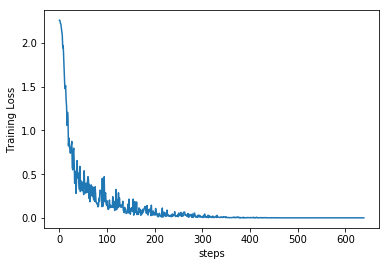

In [7]:
plt.plot(loss_val)
plt.ylabel('Training Loss')
plt.xlabel('steps');

In [8]:
y_test_pred = m.predict(x_test)
acc = accuracy(y_test, y_test_pred)

print('Test Accuracy: {}'.format(acc))

Test Accuracy: 0.9664
